In [1]:
import cv2
import numpy as np
from keras.datasets import mnist
from keras.layers import Dense, Flatten
from keras.layers.convolutional import Conv2D
from keras.models import Sequential
from keras.utils import to_categorical
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

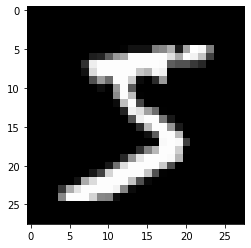

5


In [3]:
plt.imshow(X_train[0], cmap="gray")
plt.show()
print (y_train[0])

In [4]:
## Checking out the shapes involved in dataset
print ("Shape of X_train: {}".format(X_train.shape))
print ("Shape of y_train: {}".format(y_train.shape))
print ("Shape of X_test: {}".format(X_test.shape))
print ("Shape of y_test: {}".format(y_test.shape))

Shape of X_train: (60000, 28, 28)
Shape of y_train: (60000,)
Shape of X_test: (10000, 28, 28)
Shape of y_test: (10000,)


In [5]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [6]:
print ("Shape of X_train: {}".format(X_train.shape))
print ("Shape of y_train: {}".format(y_train.shape))
print ("Shape of X_test: {}".format(X_test.shape))
print ("Shape of y_test: {}".format(y_test.shape))

Shape of X_train: (60000, 28, 28, 1)
Shape of y_train: (60000,)
Shape of X_test: (10000, 28, 28, 1)
Shape of y_test: (10000,)


In [7]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

def relu(X):
   return np.maximum(0,X)

In [8]:
## Declare the model
model = Sequential()

## Declare the layers
layer_1 = Conv2D(32, kernel_size=3, activation='relu', input_shape=(28, 28, 1))
layer_2 = Conv2D(64, kernel_size=3, activation='relu')
layer_3 = Flatten()
layer_4 = Dense(10, activation='softmax')

## Add the layers to the model
model.add(layer_1)
model.add(layer_2)
model.add(layer_3)
model.add(layer_4)

In [9]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 164s 3ms/step - loss: 0.5003 - accuracy: 0.9491 - val_loss: 0.1230 - val_accuracy: 0.9618
Epoch 2/3
60000/60000 [==============================] - 168s 3ms/step - loss: 0.0758 - accuracy: 0.9771 - val_loss: 0.0949 - val_accuracy: 0.9729
Epoch 3/3
60000/60000 [==============================] - 198s 3ms/step - loss: 0.0456 - accuracy: 0.9857 - val_loss: 0.0925 - val_accuracy: 0.9784


Prediction (Softmax) from the neural network:

 [[9.9999785e-01 5.3109715e-15 3.2243214e-08 1.4190298e-15 4.1538726e-12
  2.2677989e-14 2.1955566e-06 2.9552199e-17 2.9109317e-12 5.8065986e-11]]


Hard-maxed form of the prediction: 

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


--------- Prediction --------- 




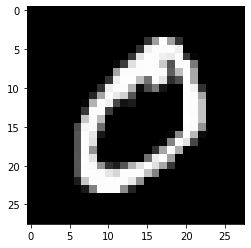



Final Output: 0


In [11]:
example = X_train[1]
prediction = model.predict(example.reshape(1, 28, 28, 1))
## First output
print ("Prediction (Softmax) from the neural network:\n\n {}".format(prediction))## Second output
hard_maxed_prediction = np.zeros(prediction.shape)
hard_maxed_prediction[0][np.argmax(prediction)] = 1
print ("\n\nHard-maxed form of the prediction: \n\n {}".format(hard_maxed_prediction))## Third output
print ("\n\n--------- Prediction --------- \n\n")
plt.imshow(example.reshape(28, 28), cmap="gray")
plt.show()
print("\n\nFinal Output: {}".format(np.argmax(prediction)))

In [13]:
def increase_brightness(img, value=30):
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    h, s, v = cv2.split(hsv)

    lim = 255 - value
    v[v > lim] = 255
    v[v <= lim] += value

    final_hsv = cv2.merge((h, s, v))
    img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
    return img

def adjust_gamma(image, gamma=1.0):
   invGamma = 1.0 / gamma
   table = np.array([
      ((i / 255.0) ** invGamma) * 255
      for i in np.arange(0, 256)])
   return cv2.LUT(image.astype(np.uint8), table.astype(np.uint8))




----------------Contoured Image--------------------


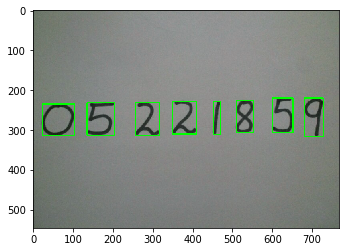

In [63]:
image = cv2.imread('test_image.jpg')
image = increase_brightness(image, value = 0)
image = adjust_gamma(image,1)
grey = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2GRAY)

ret, thresh = cv2.threshold(grey.copy(),70,255,cv2.THRESH_BINARY_INV)
# "| cv2.THRESH_OTSU" előző sor végére, zárójelen belülre
#thresh = cv2.adaptiveThreshold(grey.copy(),255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)

contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
edges = cv2.Canny(grey.copy(),255,255)

preprocessed_digits = []

for c in contours:
    
    x,y,w,h = cv2.boundingRect(c)
    
    # Creating a rectangle around the digit in the original image (for displaying the digits fetched via contours)
    cv2.rectangle(image, (x,y), (x+w, y+h), color=(0, 255, 0), thickness=2)
    
    # Cropping out the digit from the image corresponding to the current contours in the for loop
    digit = thresh[y:y+h, x:x+w]
    
    # Resizing that digit to (18, 18)
    resized_digit = cv2.resize(digit, (18,18))
    
    # Padding the digit with 5 pixels of black color (zeros) in each side to finally produce the image of (28, 28)
    padded_digit = np.pad(resized_digit, ((5,5),(5,5)), "constant", constant_values=0)
    
    # Adding the preprocessed digit to the list of preprocessed digits
    preprocessed_digits.append(padded_digit)
    
print("\n\n\n----------------Contoured Image--------------------")
plt.imshow(thresh, cmap="gray")
plt.imshow(image, cmap="gray")
plt.show()
    
inp = np.array(preprocessed_digits)



---------------------------------------


=========PREDICTION============ 




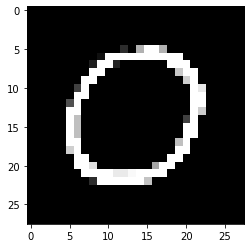



Final Output: 0

Prediction (Softmax) from the neural network:

 [[9.9999654e-01 4.4409303e-23 8.3327338e-12 7.0149506e-16 8.1717005e-24
  1.2045925e-17 3.9709142e-11 1.3999279e-18 1.7097649e-12 3.4997897e-06]]


Hard-maxed form of the prediction: 

 [[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




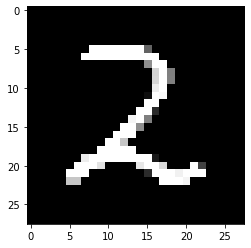



Final Output: 2

Prediction (Softmax) from the neural network:

 [[2.4747802e-21 2.9358914e-15 1.0000000e+00 1.3031017e-08 9.0993676e-25
  2.5885552e-29 1.0797890e-25 1.4173938e-11 5.0441987e-18 2.6716855e-27]]


Hard-maxed form of the prediction: 

 [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




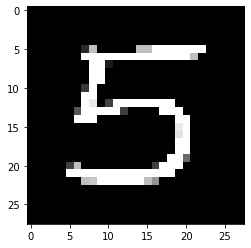



Final Output: 5

Prediction (Softmax) from the neural network:

 [[2.7168470e-18 5.1582964e-29 2.4641818e-29 7.8133133e-13 6.3805121e-23
  1.0000000e+00 2.3208582e-17 5.0381527e-21 2.6747800e-16 1.3275449e-18]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




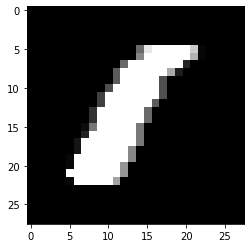



Final Output: 8

Prediction (Softmax) from the neural network:

 [[4.0167038e-04 3.7728241e-04 4.4724758e-05 1.2394338e-04 1.2957566e-06
  2.8283719e-04 3.4754411e-08 9.7375363e-10 9.9858749e-01 1.8067585e-04]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




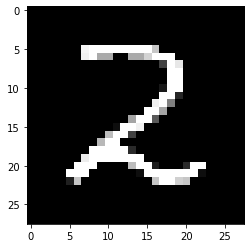



Final Output: 2

Prediction (Softmax) from the neural network:

 [[6.0051291e-19 5.0271131e-14 9.9989903e-01 1.0093012e-04 2.4223705e-19
  9.2843998e-28 2.1340739e-21 2.3974395e-11 2.9916724e-12 2.3141068e-26]]


Hard-maxed form of the prediction: 

 [[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




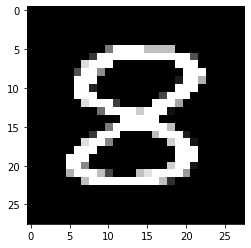



Final Output: 8

Prediction (Softmax) from the neural network:

 [[1.8449265e-20 2.0665681e-26 6.3171857e-10 2.9489303e-10 6.6842064e-27
  1.2005025e-13 1.1889775e-19 1.1415559e-24 1.0000000e+00 3.5179516e-12]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




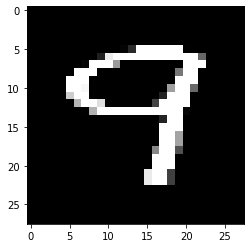



Final Output: 9

Prediction (Softmax) from the neural network:

 [[2.4904915e-11 2.9962126e-20 1.4593292e-04 1.3510686e-12 4.4918869e-10
  2.1066948e-10 6.0387543e-18 2.4317118e-05 2.6252838e-03 9.9720448e-01]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


---------------------------------------




---------------------------------------


=========PREDICTION============ 




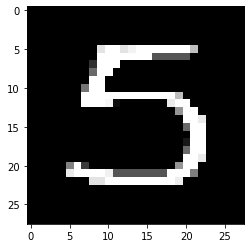



Final Output: 5

Prediction (Softmax) from the neural network:

 [[3.9783947e-15 6.5291959e-26 5.4585253e-21 3.5573161e-12 7.1887872e-23
  1.0000000e+00 7.9581403e-16 1.0237529e-16 9.4890797e-14 4.0387031e-15]]


Hard-maxed form of the prediction: 

 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


---------------------------------------




In [64]:
for digit in preprocessed_digits:
    
    prediction = model.predict(digit.reshape(1, 28, 28, 1))
    
    print ("\n\n---------------------------------------\n\n")
    print ("=========PREDICTION============ \n\n")
    
    plt.imshow(digit.reshape(28, 28), cmap="gray")
    plt.show()
    
    print("\n\nFinal Output: {}".format(np.argmax(prediction)))
    print ("\nPrediction (Softmax) from the neural network:\n\n {}".format(prediction))
    hard_maxed_prediction = np.zeros(prediction.shape)
    hard_maxed_prediction[0][np.argmax(prediction)] = 1
    print ("\n\nHard-maxed form of the prediction: \n\n {}".format(hard_maxed_prediction))
    print ("\n\n---------------------------------------\n\n")